911 Calls Dataset

## Data and Setup

In [4]:
import numpy as np
import pandas as pd

In [169]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [9]:
df=pd.read_csv("911.csv")

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [16]:
df.head(3)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1


In [20]:
top_zipcodes = df['zip'].value_counts().head(5)
top_zipcodes.astype(int)  # Convert index to integer




zip
19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: count, dtype: int64

In [23]:
df['twp'].value_counts().head(5)

twp
LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: count, dtype: int64

In [26]:
df['title'].nunique()

110

## Creating new features

In [30]:
df['Reason'] = df['title'].apply(lambda x: x.split(':')[0])  


In [33]:
df['Reason'].value_counts()

Reason
EMS        48877
Traffic    35695
Fire       14920
Name: count, dtype: int64

/var/folders/pk/bhbnq2t17dj6698_jtw74nx00000gn/T/ipykernel_2112/3145211199.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Reason',data=df,palette='viridis')


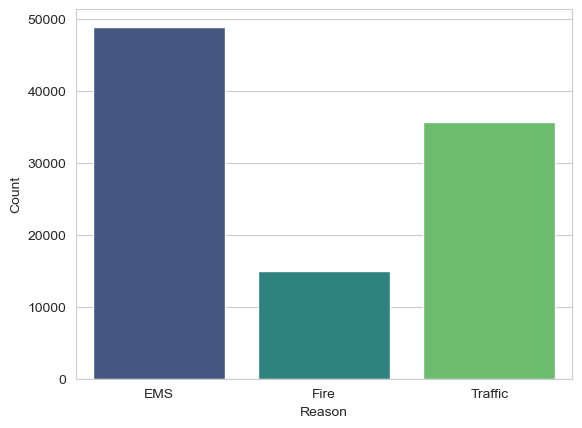

In [36]:
sns.countplot(x='Reason',data=df,palette='viridis')
plt.xlabel('Reason')
plt.ylabel('Count')
plt.show()

In [40]:
type(df['timeStamp'].iloc[0])  

str

In [43]:
df['timeStamp']=pd.to_datetime(df['timeStamp'])
type(df['timeStamp'].iloc[0])


pandas._libs.tslibs.timestamps.Timestamp


time = df['timeStamp'].iloc[0]
    time.hour


In [45]:
df['hour'] = df['timeStamp'].apply(lambda x:x.hour)
df['month'] = df['timeStamp'].apply(lambda x:x.month)
df['dayofweek']=df['timeStamp'].apply(lambda x:x.dayofweek)
df[['hour','month','dayofweek']].head()



,hour,month,dayofweek
0,17,12,3
1,17,12,3
2,17,12,3
3,17,12,3
4,17,12,3


**The Day of Week is an integer 0-6. Use the .map() with this dictionary to map the actual string names to the day of the week:**

    dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [48]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [50]:
df['dayofweek']=df['dayofweek'].map(dmap)
df['dayofweek'].head()

0    Thu
1    Thu
2    Thu
3    Thu
4    Thu
Name: dayofweek, dtype: object

**Use seaborn to create a countplot of the Day of Week column with the hue based off of the Reason column.**

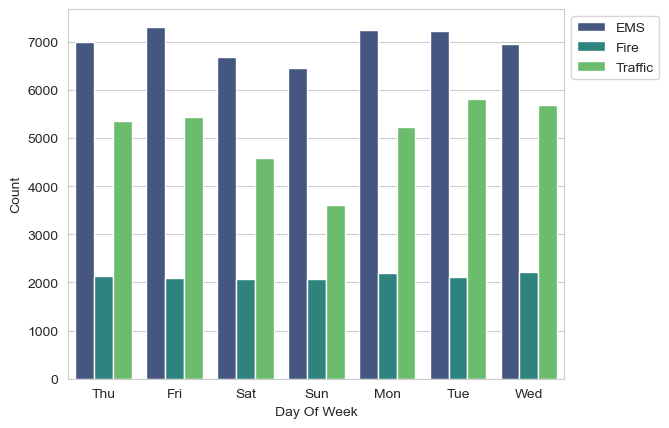

In [52]:
sns.countplot(x='dayofweek',data=df,hue='Reason',palette='viridis')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=10)
plt.xlabel('Day Of Week')
plt.ylabel('Count')
plt.show()

**Now do the same for Month:**

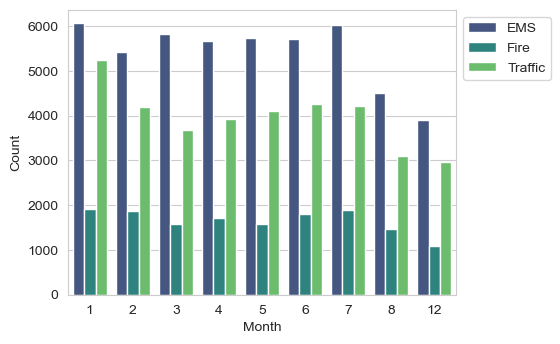

In [55]:
plt.figure(figsize=(5, 3.7))
sns.countplot(x='month',data=df,hue='Reason',palette='viridis')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=10)
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()

**You should have noticed it was missing some Months, we fill in this information by plotting the information with a simple line plot that fills in the missing months**

**Now create a gropuby object called byMonth, where you group the DataFrame by the month column and use the count() method for aggregation. Use the head() method to show the head of this returned DataFrame.**

In [59]:
byMonth = df.groupby('month').count()
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,hour,dayofweek
month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423


**Now create a simple plot off of the dataframe with .plot() indicating the count of calls per month.**

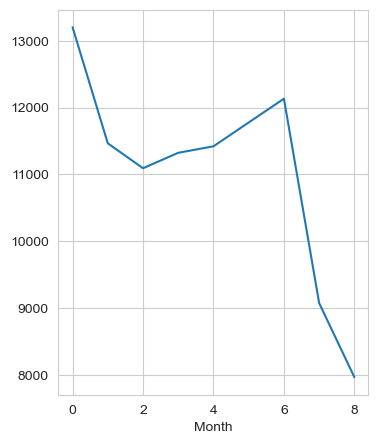

In [88]:
byMonth['twp'].plot(kind='line', figsize=(4, 5))
plt.xlabel('Month')
plt.grid(True)
plt.show()

**Use seaborn's lmplot() to create a linear fit on the number of calls per month. You may need to reset the index to a column.**

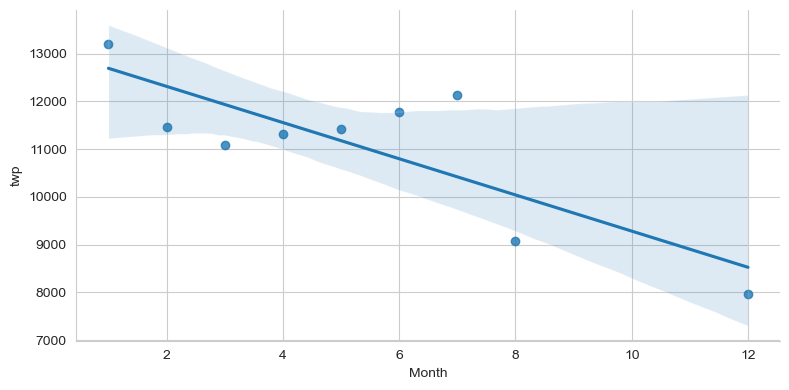

In [97]:

byMonth = df.groupby('month').count().reset_index()  

sns.lmplot(x='month', y='twp', data=byMonth, aspect=2, height=4)
plt.xlabel('Month')
plt.ylabel('twp')
plt.show()


**Create a new column called 'Date' that contains the date from the timeStamp column. You'll need to use apply along with the .date() method.** 

In [99]:
df['Date'] = df['timeStamp'].apply(lambda x: x.date())
df[['timeStamp', 'Date']].head()

,timeStamp,Date
0,2015-12-10 17:40:00,2015-12-10
1,2015-12-10 17:40:00,2015-12-10
2,2015-12-10 17:40:00,2015-12-10
3,2015-12-10 17:40:01,2015-12-10
4,2015-12-10 17:40:01,2015-12-10


**Groupby this Date column with the count() aggregate and create a plot of counts of 911 calls.**

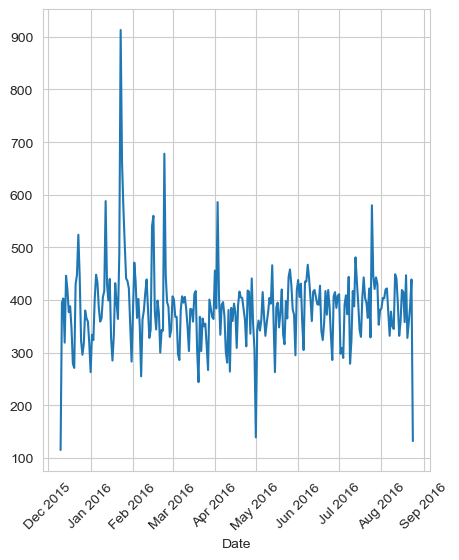

In [125]:
byDate = df.groupby('Date').count()
plt.figure(figsize=(5,6))
byDate['twp'].plot()
plt.xlabel('Date')
plt.xticks(rotation=45)
ax = plt.gca()  
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))  
ax.xaxis.set_major_locator(mdates.MonthLocator())  
plt.show()

**Recreate this plot but create 3 separate plots with each plot representing a Reason for the 911 call. Title the plot. Use plt.tight_layout() to adjust the axis**

<Figure size 500x400 with 0 Axes>

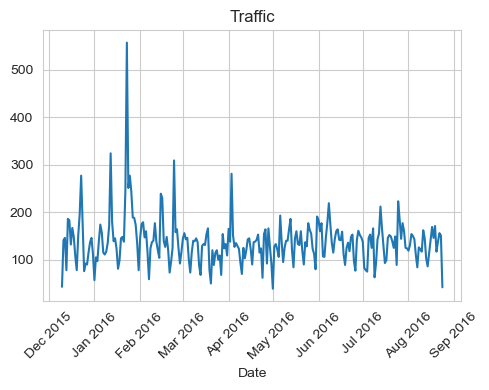

In [163]:
byDateReason = df.groupby(['Date', 'Reason']).count().unstack()['twp']

plt.figure(figsize=(5, 4))
plt.plot(byDateReason.index, byDateReason['Traffic'])
plt.title('Traffic')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.tight_layout()
plt.show()


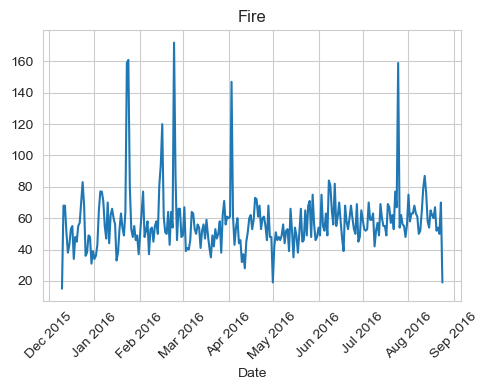

In [165]:
plt.figure(figsize=(5, 4))
plt.plot(byDateReason.index, byDateReason['Fire'])
plt.title('Fire')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.tight_layout()
plt.show()

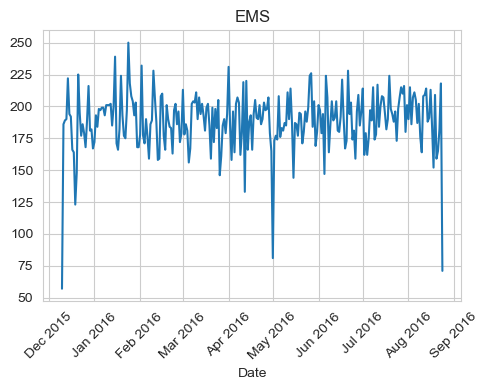

In [167]:
plt.figure(figsize=(5, 4))
plt.plot(byDateReason.index, byDateReason['EMS'])
plt.title('EMS')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.tight_layout()
plt.show()

# PART II: Stock Trading (Cont'd)

Part II involves coding problems relevant to the lecture notebook ``Stock Trading.ipynb``.

1. Write a function ``ema_trade`` for moving average based trading, using the sample codes in ``Stock Trading.ipynb`` with the following input arguments:

-  ``ticker``: ticker of a stock
-  ``start``: start date of the trading period
-  ``end``: end date of the trading period
-  ``fast_ema_span``: span (window length) of the fast EMA with narrow window
-  ``slow_ema_span``:  span of the slow EMA with wide window

You will just load the data from ``stooq``. ``ema_trade``function does not return anything but only plots the trades and volumes on time series and the accumulated return rates (for both the EMA and buy/hold strateges) **on the same camvas**.

Import appropriate libraries and complete the following cells:

In [85]:
# import libraries here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")
import pandas_datareader as pdr

In [92]:
def ema_trade(ticker, start, end, fast_ema_span, slow_ema_span): # complete this function
    data = pdr.get_data_stooq(ticker, start=start, end=end)
    data.drop(['Close', 'High', 'Low'], axis = 1, inplace= True)
    data[str(fast_ema_span) + '-day'] = data['Open'].ewm(span=fast_ema_span, adjust = False).mean()
    data[str(slow_ema_span) + '-day'] = data['Open'].ewm(span=slow_ema_span, adjust = False).mean()
    data['signal'] = np.where(data[str(fast_ema_span) + '-day'] > data[str(slow_ema_span) + '-day'], 1, 0)
    data['signal'] = np.where(data['5-day'] < data['14-day'], -1, data['signal'])
    data['entry'] = data['signal'].diff()
    data['return'] = -np.log(data['Open']).diff(-1)
    data['strategy_return'] = data['return']*data['signal']
    long = data[['Open']][data['entry'] ==2]
    short = data[['Open']][data['entry'] <0]
    
    
    # Set up the figure with 3 subplots: price and EMAs, trade volume, and return rates
    fig, ax = plt.subplots(3, 1, gridspec_kw={'height_ratios': [4, 1, 4]}, figsize=(14, 12)) 
    fig.tight_layout(pad=2)
    
    # Plot the close price and EMAs on the first subplot
    ax[0].plot(data['Open'], label='Price',lw=1)
    ax[0].plot(data[str(fast_ema_span) + '-day'], label=f'EMA-Fast')
    ax[0].plot(data[str(slow_ema_span) + '-day'], label=f'EMA-Slow')
    ax[0].plot(long, '^', color = 'k', markersize= 12, label = 'Long')
    ax[0].plot(short, 'v', color = 'r', markersize= 12, label = 'Short')
    ax[0].set_ylabel('Price in $')
    ax[0].set_title('Trades')
    ax[0].legend(loc='best')
    ax[0].grid(False)
    
    ax[1].bar(data.index, height = data['Volume'], width=2, color='blue')
    ax[1].set_ylabel('Volume', fontsize = 16)
    ax[1].grid(True)
    ax[2].plot(100*np.exp(data['strategy_return']).cumprod(), label = 'EMA Strategy')
    ax[2].plot(100*np.exp(data['return']).cumprod(), label = 'Buy/Hold')
    ax[2].legend(loc='best')
    ax[2].set_ylabel('Return in %')
    ax[2].set_title('Returns', fontsize = 16)
    ax[2].grid(False)
    
    plt.show()

Reproduce the results/plots in the notebook by simply calling ``ema_trade`` with 5-day and 14-day EMAs, and **label the curves and markers properly** as in the referenced plots.

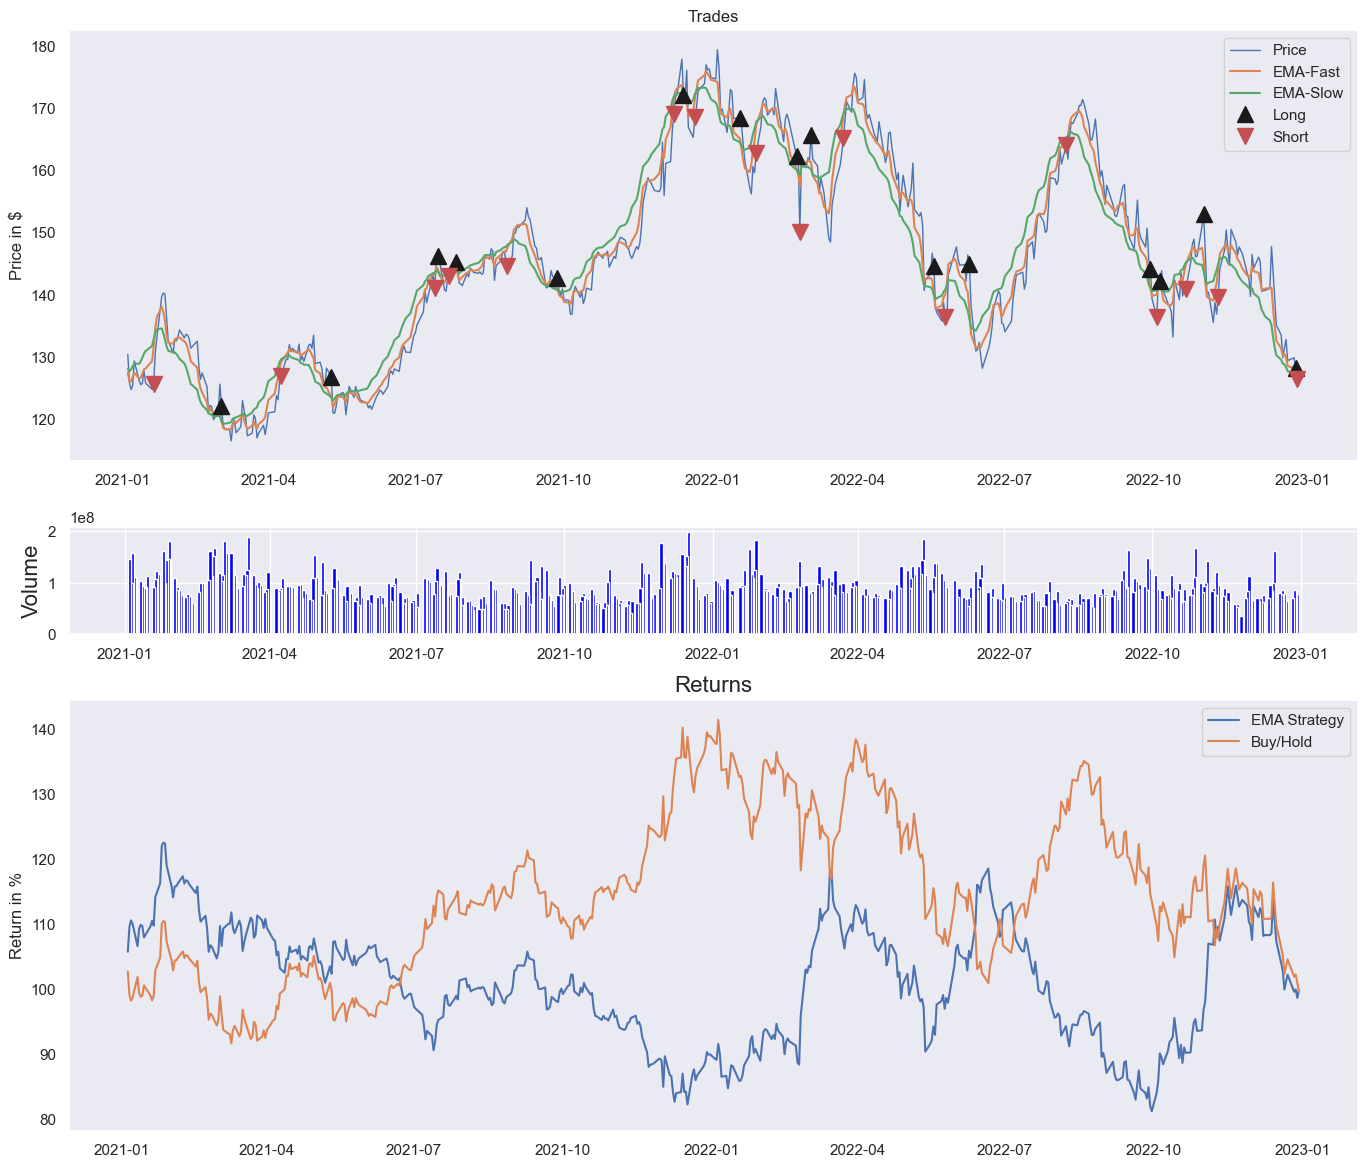

In [95]:
ema_trade('AAPL', '2021-01-01', '2022-12-31', 5, 14)

In [112]:
def ema_trade_no_short(ticker, start, end, fast_ema_span, slow_ema_span):
    df = web.DataReader(ticker, data_source='stooq', start=start, end=end)
    df = df.sort_index()
    df['Fast_EMA'] = df['Close'].ewm(span=fast_ema_span, adjust=False).mean()
    df['Slow_EMA'] = df['Close'].ewm(span=slow_ema_span, adjust=False).mean()
    df['Signal'] = np.where(df['Fast_EMA'] > df['Slow_EMA'], 1, 0)
    df['Position'] = df['Signal'].diff()
    df['Return'] = df['Close'].pct_change()
    df['BuyHold'] = (1 + df['Return']).cumprod() * 100
    df['Strategy'] = (1 + df['Return'] * df['Signal'].shift(1)).cumprod() * 100
    fig, ax = plt.subplots(3, 1, gridspec_kw={'height_ratios': [4, 1, 4]}, figsize=(14, 12))
    fig.tight_layout(pad=2)
    ax[0].plot(df.index, df['Close'], label='Price', alpha=0.6)
    ax[0].plot(df.index, df['Fast_EMA'], label='EMA-Short')
    ax[0].plot(df.index, df['Slow_EMA'], label='EMA-Long')
    ax[0].plot(df[df['Position'] == 1].index,df['Close'][df['Position'] == 1],'^', markersize=10, color='k', label='Long')
    ax[0].plot(df[df['Position'] == -1].index,df['Close'][df['Position'] == -1],'v', markersize=10, color='r', label='Close Long')

    ax[0].set_title('Trades')
    ax[0].set_ylabel('Price in $')
    ax[0].legend()

    ax[1].bar(df.index, df['Volume'], width=1.0, color='blue')
    ax[1].set_ylabel('Volume')

    ax[2].plot(df.index, df['Strategy'], label='EMA Strategy', drawstyle='steps-post')
    ax[2].plot(df.index, df['BuyHold'], label='Buy/Hold',  drawstyle='steps-post')
    ax[2].set_title('Returns')
    ax[2].set_ylabel('Return in %')
    ax[2].legend()

    plt.xlabel("Date")
    plt.show()

Run ``ema_trade_no_short`` with the same input arguments. Please **label the curves and markers properly** as in the referenced plots.

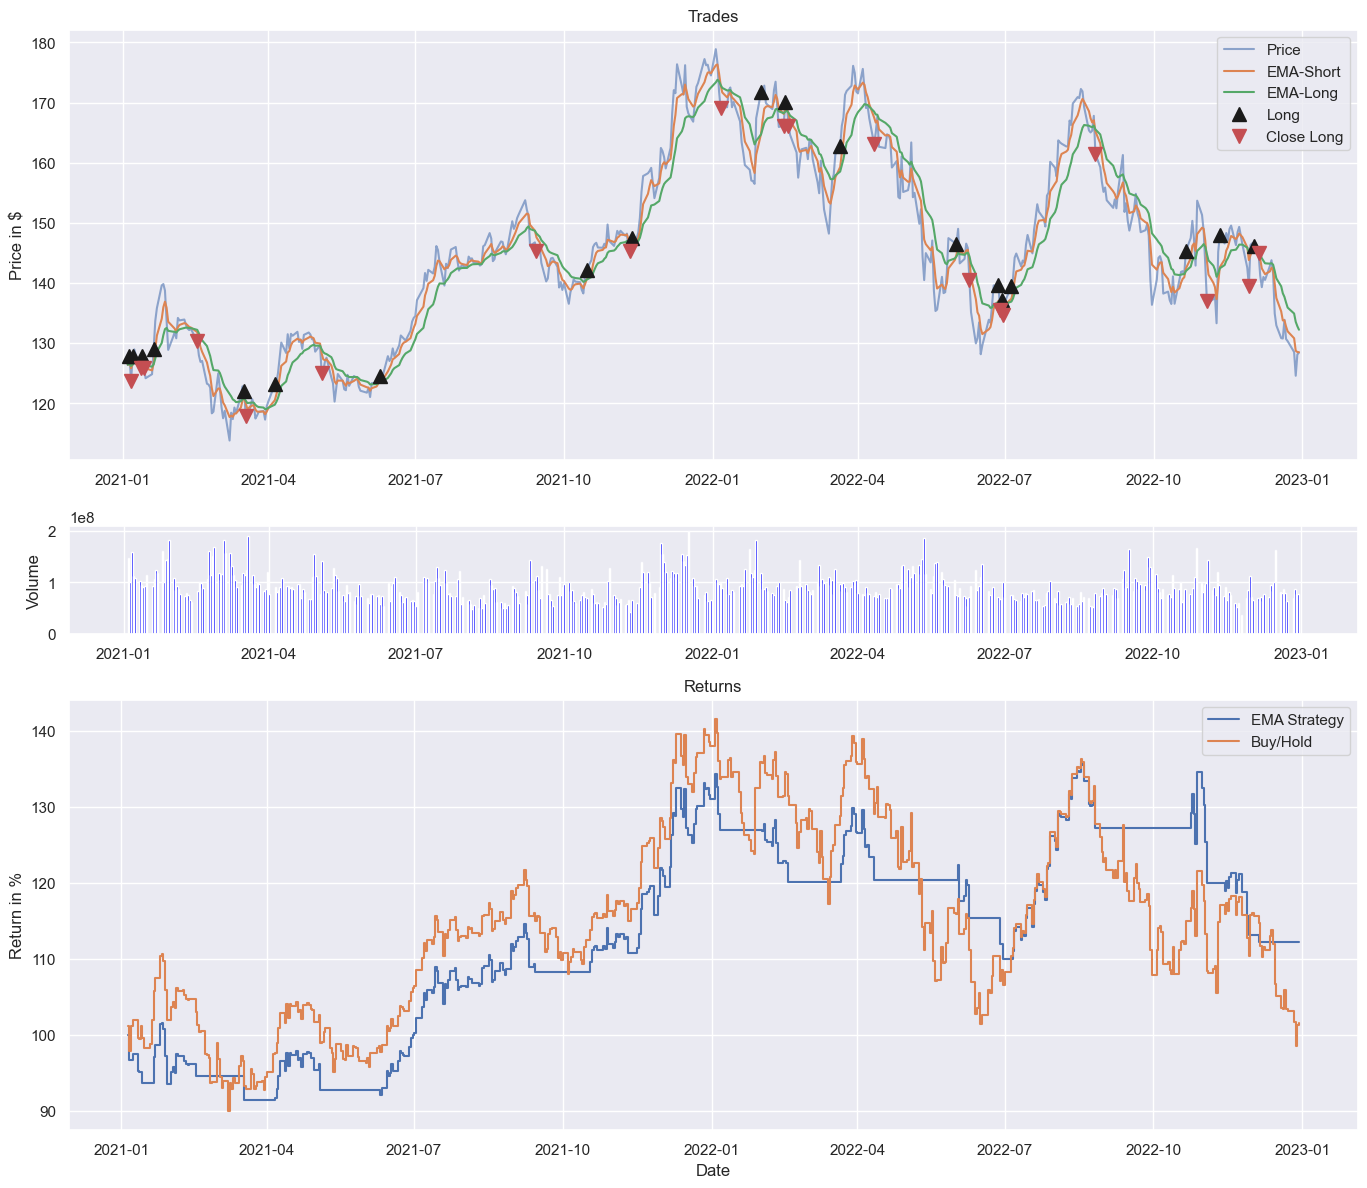

In [115]:
ema_trade_no_short('AAPL', '2021-01-01', '2022-12-31', 5, 14)